In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving eda_data.csv to eda_data.csv


In [3]:
df = pd.read_csv('eda_data.csv')

In [4]:
df.head()

,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
0,1970-01-01,California,52.7,29.5,37.5,52.7,29.5,37.0,29.7,74.3,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1,1970-01-02,California,53.5,27.4,38.2,53.5,27.4,38.0,29.1,70.8,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
2,1970-01-03,California,52.4,27.5,38.5,52.4,27.5,37.8,27.7,66.3,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
3,1970-01-04,California,50.3,27.4,36.9,50.3,26.4,34.8,27.5,69.6,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
4,1970-01-05,California,48.5,27.2,36.4,48.5,24.4,35.5,27.9,71.8,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0


In [5]:
df.isnull().sum()

datetime             0
name                 0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
clear-day            0
cloudy               0
fog                  0
partly-cloudy-day    0
rain_icon            0
wind                 0
dtype: int64

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.set_index('datetime', inplace = True)
df.sort_index(inplace = True)

df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,,
1970-01-01,California,52.7,29.5,37.5,52.7,29.5,37.0,29.7,74.3,0.0,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-02,California,53.5,27.4,38.2,53.5,27.4,38.0,29.1,70.8,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-03,California,52.4,27.5,38.5,52.4,27.5,37.8,27.7,66.3,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-04,California,50.3,27.4,36.9,50.3,26.4,34.8,27.5,69.6,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-05,California,48.5,27.2,36.4,48.5,24.4,35.5,27.9,71.8,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0


In [11]:
features = df.drop(columns = ['precip', 'name', 'precipprob', 'precipcover', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations'], axis=1)
X = features
y = df['precip']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [13]:
X_train.tail()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2009-07-05,80.0,54.1,65.1,80.0,54.1,65.1,55.1,72.4,16.1,190.1,1013.6,0.2,9.9,0.45,0,0,0,0,1,0
2009-07-06,86.4,53.8,67.7,83.1,53.8,67.1,47.8,56.2,12.4,190.7,1014.3,0.1,9.9,0.48,1,0,0,0,0,0
2009-07-07,84.2,54.3,67.9,81.8,54.3,67.5,48.8,54.4,12.9,189.4,1011.9,0.1,9.9,0.50,1,0,0,0,0,0
2009-07-08,88.1,54.8,71.8,84.5,54.8,70.9,47.5,47.8,13.9,219.8,1011.9,0.2,9.9,0.55,1,0,0,0,0,0
2009-07-09,88.0,56.5,71.3,84.8,56.5,70.6,49.7,50.4,10.6,186.1,1012.6,0.0,9.9,0.58,1,0,0,0,0,0


In [14]:
X_test.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2009-07-10,88.4,56.0,70.8,84.9,56.0,70.1,47.9,49.0,10.8,187.6,1013.6,1.3,9.9,0.62,1,0,0,0,0,0
2009-07-11,88.1,60.2,72.8,84.6,60.2,72.0,47.9,44.4,11.7,183.3,1014.3,2.2,9.9,0.65,1,0,0,0,0,0
2009-07-12,90.4,61.1,74.1,86.5,61.1,73.1,46.9,42.4,11.8,187.5,1015.3,1.7,9.9,0.68,1,0,0,0,0,0
2009-07-13,96.0,56.1,77.0,91.4,56.1,75.4,45.8,39.4,14.8,333.2,1014.3,0.0,9.9,0.72,1,0,0,0,0,0
2009-07-14,101.2,62.8,82.2,96.6,62.8,80.5,49.1,36.9,8.3,272.0,1009.7,0.0,9.9,0.75,1,0,0,0,0,0


In [15]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [16]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3,
                                      batch_size = 64)

In [17]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 3, batch_size = 64)

In [18]:
input_shape = train_sequences[0][0][0].shape

In [19]:
model = Sequential()

model.add(GRU(8, input_shape = input_shape, return_sequences = True)) # True when next layer is also RNN
model.add(GRU(16, return_sequences = False)) # False is next layer is Dense/Not RNN
model.add(Dense(8, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation = None))

# I want to add r2 as metric but HOW!?

In [20]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam', metrics = 'mse')

es = EarlyStopping(patience = 15)

history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    callbacks = [es],
                    epochs = 50)

Epoch 1/50
214/214 [==============================] - 8s 15ms/step - loss: 0.1345 - mse: 0.0577 - val_loss: 0.0811 - val_mse: 0.0334
Epoch 2/50
214/214 [==============================] - 2s 8ms/step - loss: 0.0783 - mse: 0.0477 - val_loss: 0.0506 - val_mse: 0.0329
Epoch 3/50
214/214 [==============================] - 2s 9ms/step - loss: 0.0583 - mse: 0.0471 - val_loss: 0.0392 - val_mse: 0.0325
Epoch 4/50
214/214 [==============================] - 2s 9ms/step - loss: 0.0510 - mse: 0.0466 - val_loss: 0.0352 - val_mse: 0.0324
Epoch 5/50
214/214 [==============================] - 2s 11ms/step - loss: 0.0487 - mse: 0.0469 - val_loss: 0.0339 - val_mse: 0.0327
Epoch 6/50
214/214 [==============================] - 2s 10ms/step - loss: 0.0473 - mse: 0.0463 - val_loss: 0.0333 - val_mse: 0.0326
Epoch 7/50
214/214 [==============================] - 2s 9ms/step - loss: 0.0470 - mse: 0.0464 - val_loss: 0.0329 - val_mse: 0.0324
Epoch 8/50
214/214 [==============================] - 2s 8ms/step - loss:

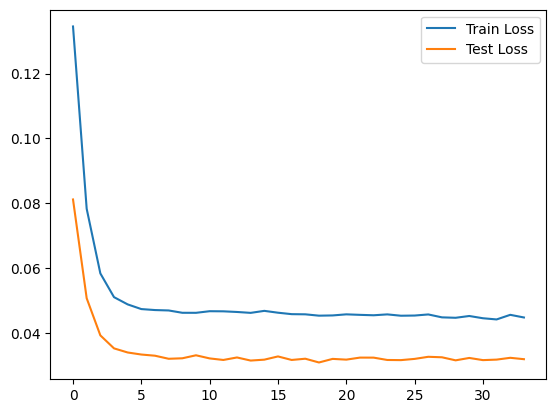

In [21]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [ ]:
# Figuring out predictions and graphing next year

In [23]:
model.evaluate(test_sequences)

72/72 [==============================] - 1s 7ms/step - loss: 0.0318 - mse: 0.0313


[0.031830985099077225, 0.031347401440143585]